In [1]:
%matplotlib inline

import numpy as np
import copy
import matplotlib.pyplot as plt
import pickle
import random
import torch
from utils import torch_from_numpy
import datetime

from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early, cfg_policy_evaluation_maxiter
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early
# num_iter_max=200000
env_name = 'CustomCartPole-v0'
figfilenamehead = "fig_policy_optimization_"+env_str+"_iter2_"

from config import cfg_alpha
alpha=cfg_alpha

loss_list = []
normalized_loss_list = []

policy_evaluation_maxiter = cfg_policy_evaluation_maxiter
print("policy_evaluation_maxiter",policy_evaluation_maxiter)
print("alpha",alpha)
print("seed",seed)
print(datetime.datetime.now())

policy_evaluation_maxiter 5
alpha 0.2
seed 2
2023-07-23 21:49:15.324141


In [2]:
import gym
import custom_gym
env = gym.make(env_name)

np.random.seed(seed)
random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)

4 1 2


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:268: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


In [3]:


from sac import SAC
# agent = SAC(env.observation_space.shape[0], env.action_space)
agent = SAC(env.observation_space.shape[0]+z_dim*2, env.action_space)
agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_bamdp_weightedvae_")


offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))
debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)

Loading models from checkpoints/sac_checkpoint_custom_cartpole_bamdp_weightedvae_


In [4]:
args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":None,
    "bamdp_policy":agent.policy.my_np_select_action,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
}
# import vi_base
# vi = vi_base.baseVI(args_init_dict)
import vi_iw
iwvi = vi_iw.iwVI(args_init_dict)

# iwvi.load_base(ckpt_key="unweighted")
iwvi.load(ckpt_key="policy_optimization_iter1")

dec: h_dim 64
iwvi load ckpt1, ckpt2 ckpt_iwvi_basepartcartpole_policy_optimization_iter1 ckpt_iwvi_cartpole_policy_optimization_iter1
base load ckpt ckpt_basevi_cartpole_policy_optimization_iter1
base load self.initial_belief.data.sum() tensor(-6.2707)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(4.9619)
penalty_target_min tensor(-12.3237) penalty_target_max tensor(100.5854)
train_loss:  -11.285684227371217
valid_loss:  -8.484132442474365
h_min_tilde -12.323723 ell_tilde -10.725373870391847 kappa_tilde 0.0007909776230651568
success load ckpt_iwvi_basepartcartpole_policy_optimization_iter1
train_loss:  -8.145551812458038
valid_loss:  -23.622136317253116
weight_alpha 1.0 h_min_tilde -12.323723 ell_tilde -11.240868713417052 kappa_tilde 0.0009609814891566592


In [5]:
# plt.figure(figsize=(18,10), dpi=250)
# np_mulogvar = iwvi.mulogvar_offlinedata.numpy()
# plt.xlabel("daming coeff")
# plt.ylabel("latent variable mean")

# plt.plot(debug_info[iwvi.validdata_num:,1], np_mulogvar[iwvi.validdata_num:,0], "o")
# plt.plot(debug_info[:iwvi.validdata_num,1], np_mulogvar[:iwvi.validdata_num,0], "o")
# # plt.xlim([-0.05,0.35])
# for i in range(len(debug_info)):
#     plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
# plt.savefig(figfilenamehead+"damping_latent_"+env_str+"_iter0.png")
# plt.savefig(figfilenamehead+"damping_latent_"+env_str+"_iter0.eps")
# # plt.savefig(figfilenamehead+"damping_latent_"+env_str+"_iter0.pdf")
# plt.show()


# for i in range(10):
#     print(debug_info[i*10 : (i+1)*10,1])
# # plt.show()
# print("摩擦係数-潜在変数")

In [6]:
iwvi.get_real_rollout_bamdppolicy_data()


 0 9.5367431640625e-07


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):



 1 3.661296844482422

 2 4.273246765136719

 3 5.021153926849365

 4 4.915245771408081

 5 7.286092042922974

 6 4.855661153793335

 7 3.4727728366851807

 8 3.5397422313690186

 9 3.6632883548736572

 10 3.447535514831543

 11 3.7395970821380615

 12 3.6462249755859375

 13 4.010610818862915

 14 5.996553421020508

 15 3.5914955139160156

 16 3.7547526359558105

 17 6.320930242538452

 18 3.302593231201172

 19 3.3896899223327637

 20 3.3963186740875244

 21 3.2625274658203125

 22 3.525783061981201

 23 3.5728347301483154

 24 3.4781763553619385

 25 3.427222490310669

 26 4.70653772354126

 27 6.860048532485962

 28 7.012993574142456

 29 6.768471002578735

 30 6.689127445220947

 31 7.097901344299316

 32 6.7326884269714355

 33 6.946151971817017

 34 7.071304798126221

 35 6.832370042800903

 36 7.059826612472534

 37 7.10963773727417

 38 7.133740663528442

 39 4.227003812789917

 40 3.3728044033050537

 41 3.4324398040771484

 42 3.38287615776062

 43 3.3072261810302734

 44 3.

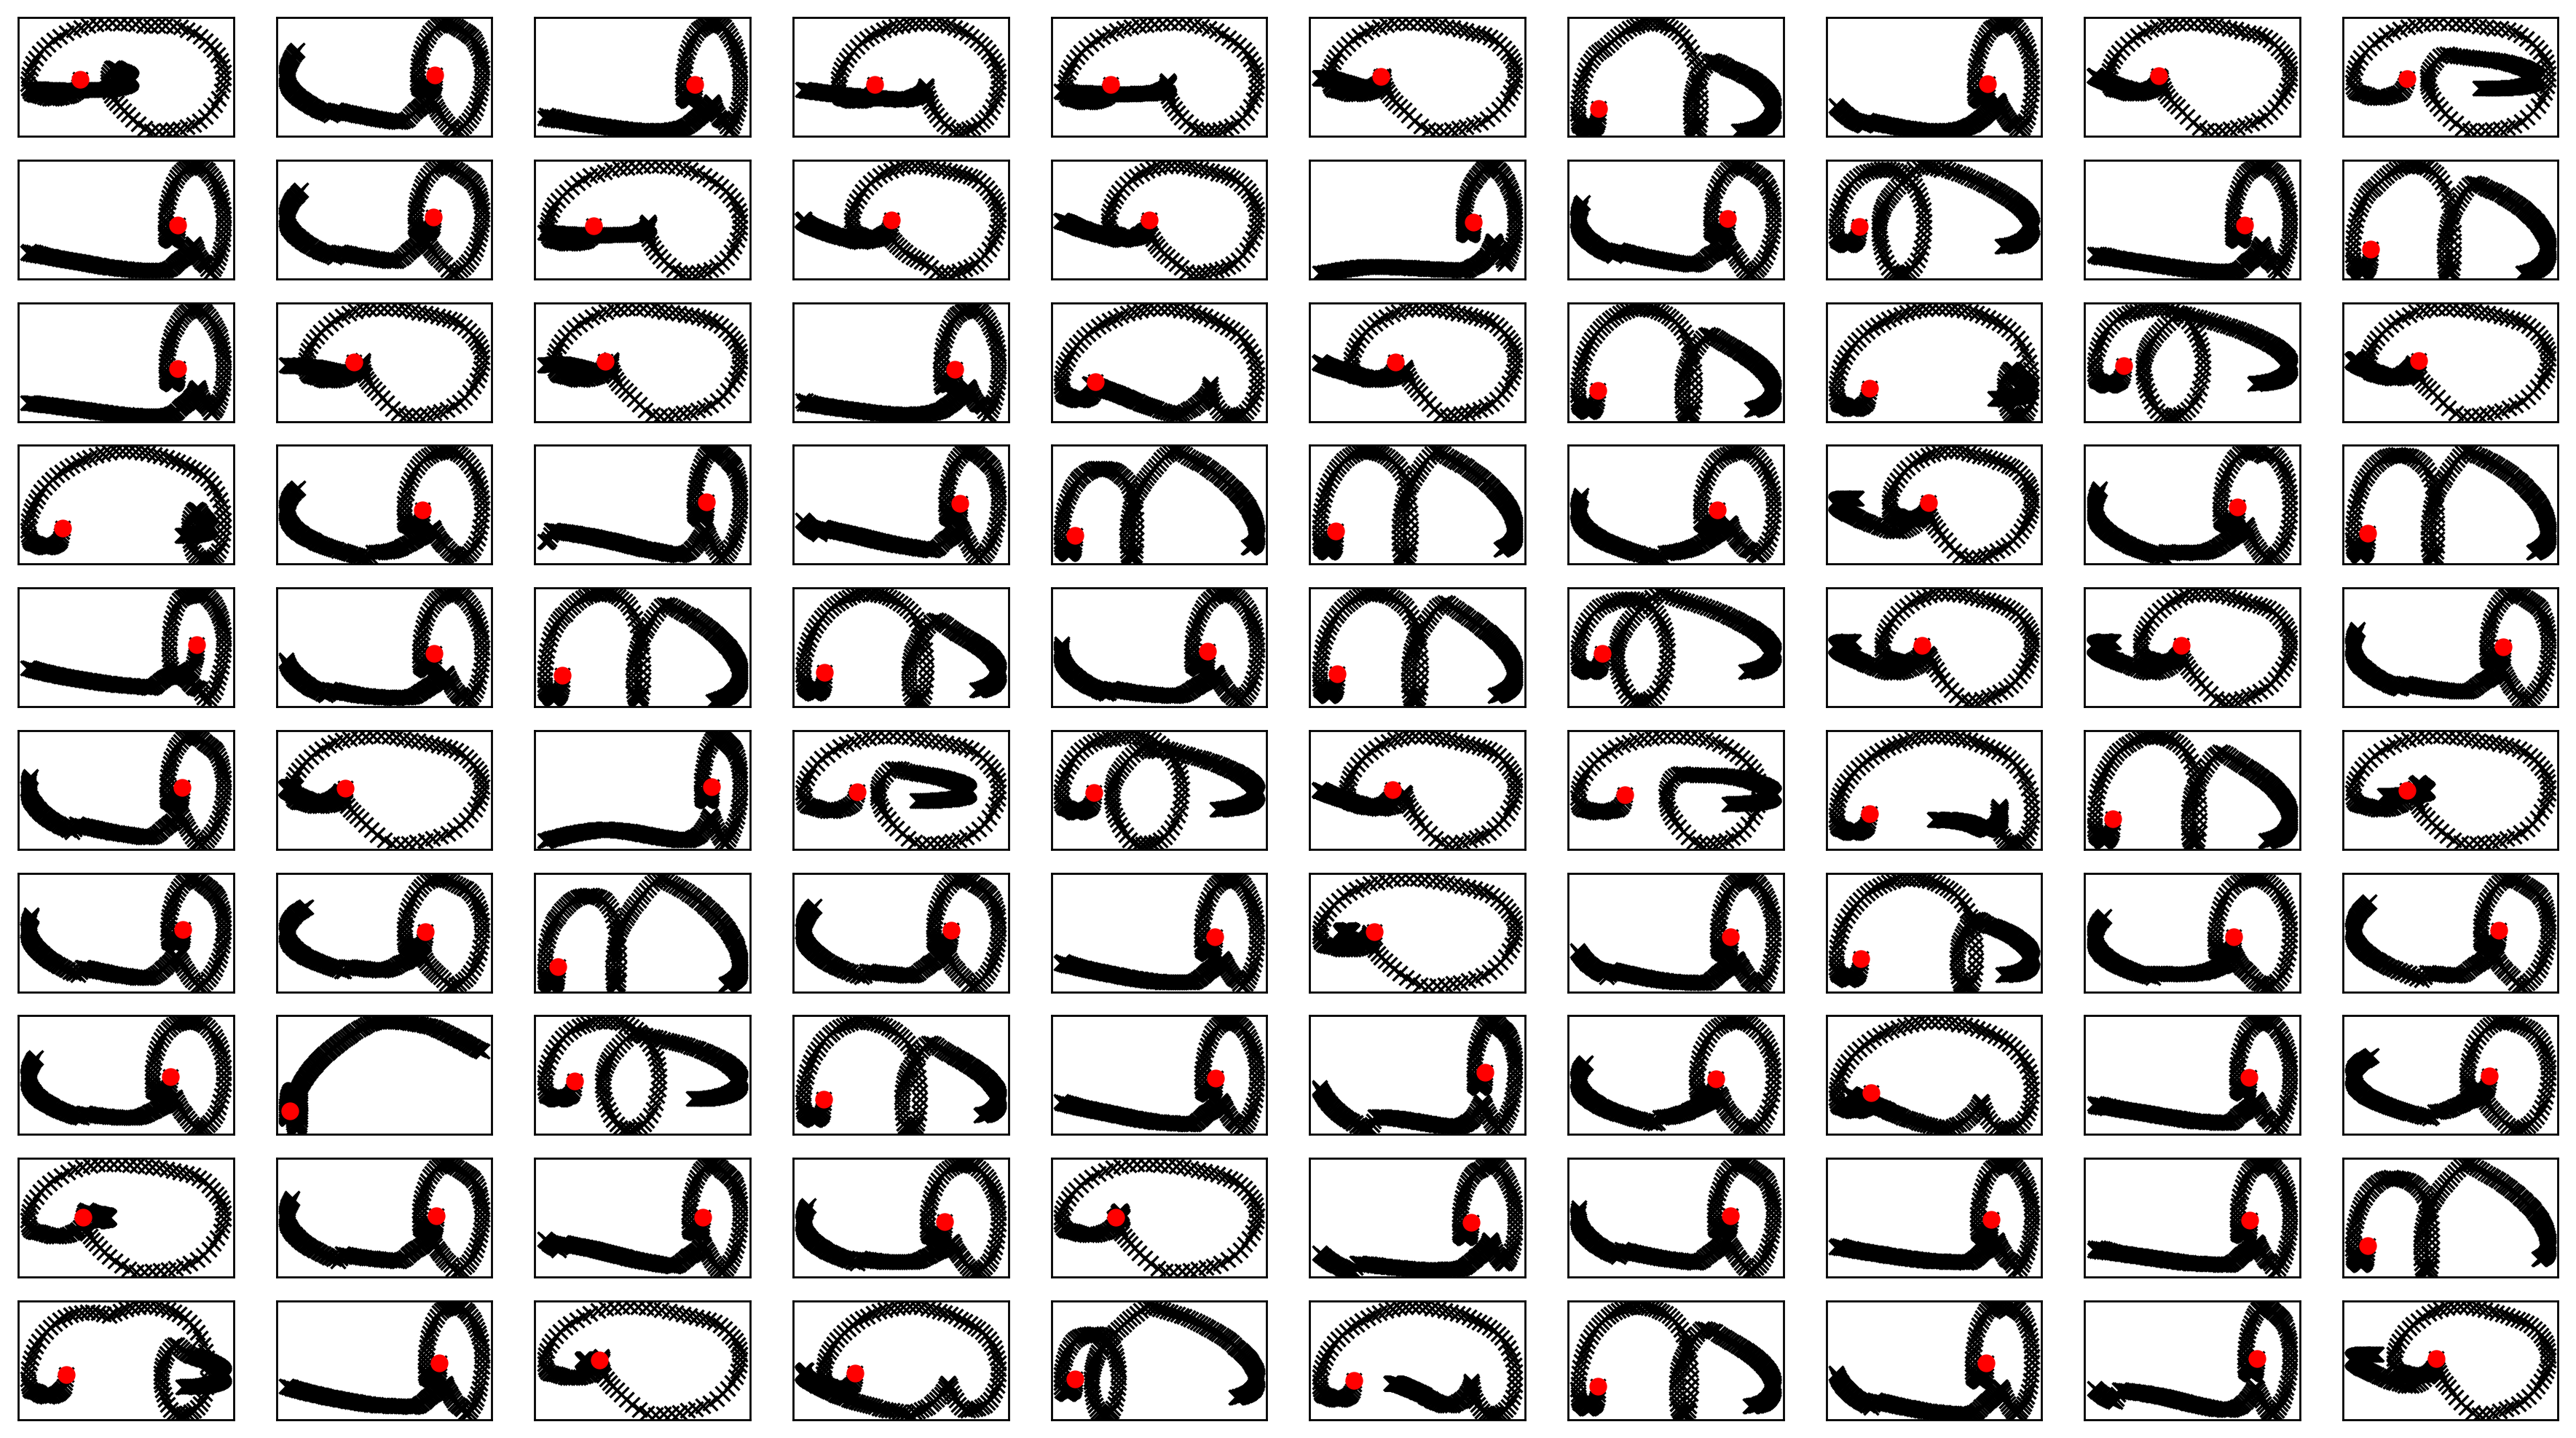

In [7]:
fig = plt.figure(figsize=(18,10), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(iwvi.debug_realenv_rolloutdata[i][:,0], iwvi.debug_realenv_rolloutdata[i][:,1],"kx") 
    ax_list[-1].plot(0, 0,"ro")
plt.show()

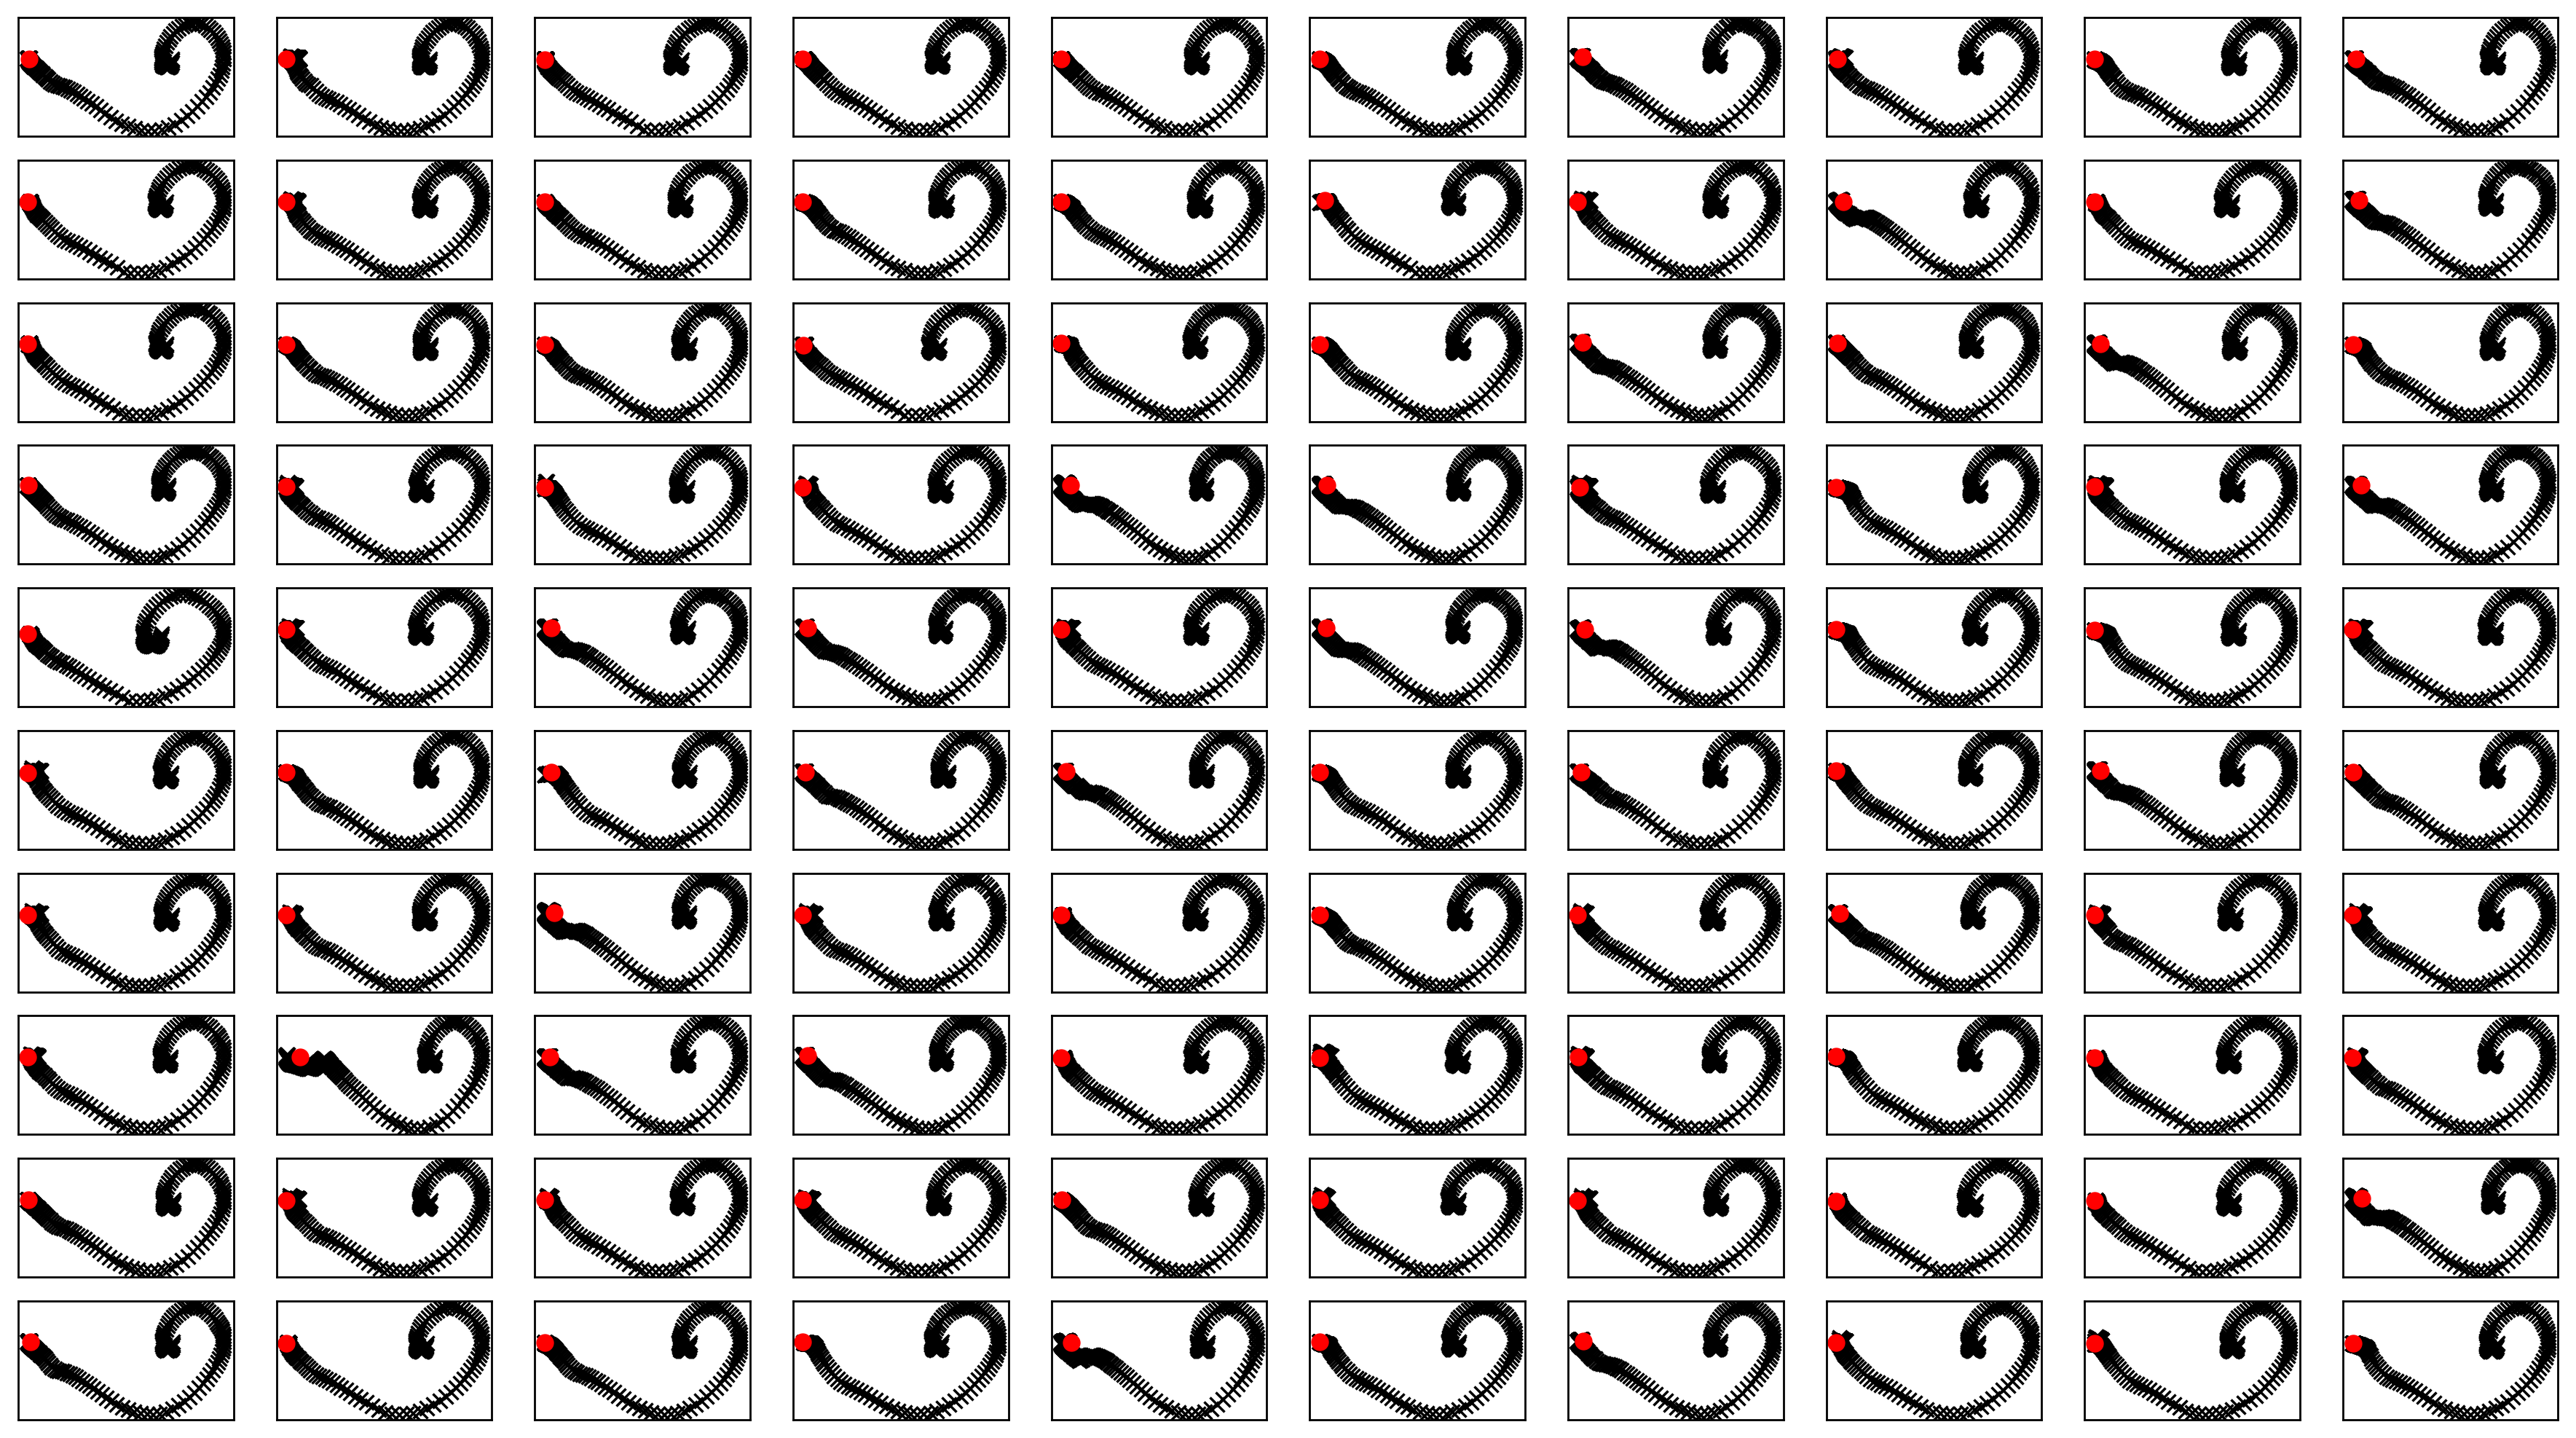

In [8]:
fig = plt.figure(figsize=(18,10), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(iwvi.debug_realenv_rolloutdata[i][:,2], iwvi.debug_realenv_rolloutdata[i][:,3],"kx") 
    ax_list[-1].plot(0, 0,"ro")
plt.show()

In [9]:
iwvi.get_sim_rollout_bamdppolicy_data_fixlen()
simdata0a = copy.deepcopy(iwvi.simenv_rolloutdata)
iwvi.get_sim_rollout_bamdppolicy_data_fixlen()
simdata0b = copy.deepcopy(iwvi.simenv_rolloutdata)


 0 4.76837158203125e-07

 1 7.0387184619903564

 2 6.641653060913086

 3 7.0393548011779785

 4 7.064502000808716

 5 7.221911907196045

 6 7.028104782104492

 7 6.995263576507568

 8 6.777360916137695

 9 3.3284623622894287

 10 5.5288779735565186

 11 7.002954959869385

 12 6.778388738632202

 13 6.947300910949707

 14 6.920996189117432

 15 7.310200929641724

 16 7.417795658111572

 17 5.422302722930908

 18 3.426896810531616

 19 3.3356282711029053

 20 3.571840763092041

 21 3.4593725204467773

 22 3.4424023628234863

 23 3.5246665477752686

 24 5.7679688930511475

 25 6.737498760223389

 26 6.868182182312012

 27 7.0445237159729

 28 7.132748126983643

 29 6.860406875610352

 30 4.6752541065216064

 31 7.124326705932617

 32 6.894490718841553

 33 6.955775737762451

 34 3.530219793319702

 35 3.3674514293670654

 36 3.2824532985687256

 37 3.014652967453003

 38 2.8297362327575684

 39 3.4006617069244385

 40 3.294377565383911

 41 3.442610740661621

 42 3.3100733757019043

 43 

実環境方策rollout vs Sim環境方策rollout


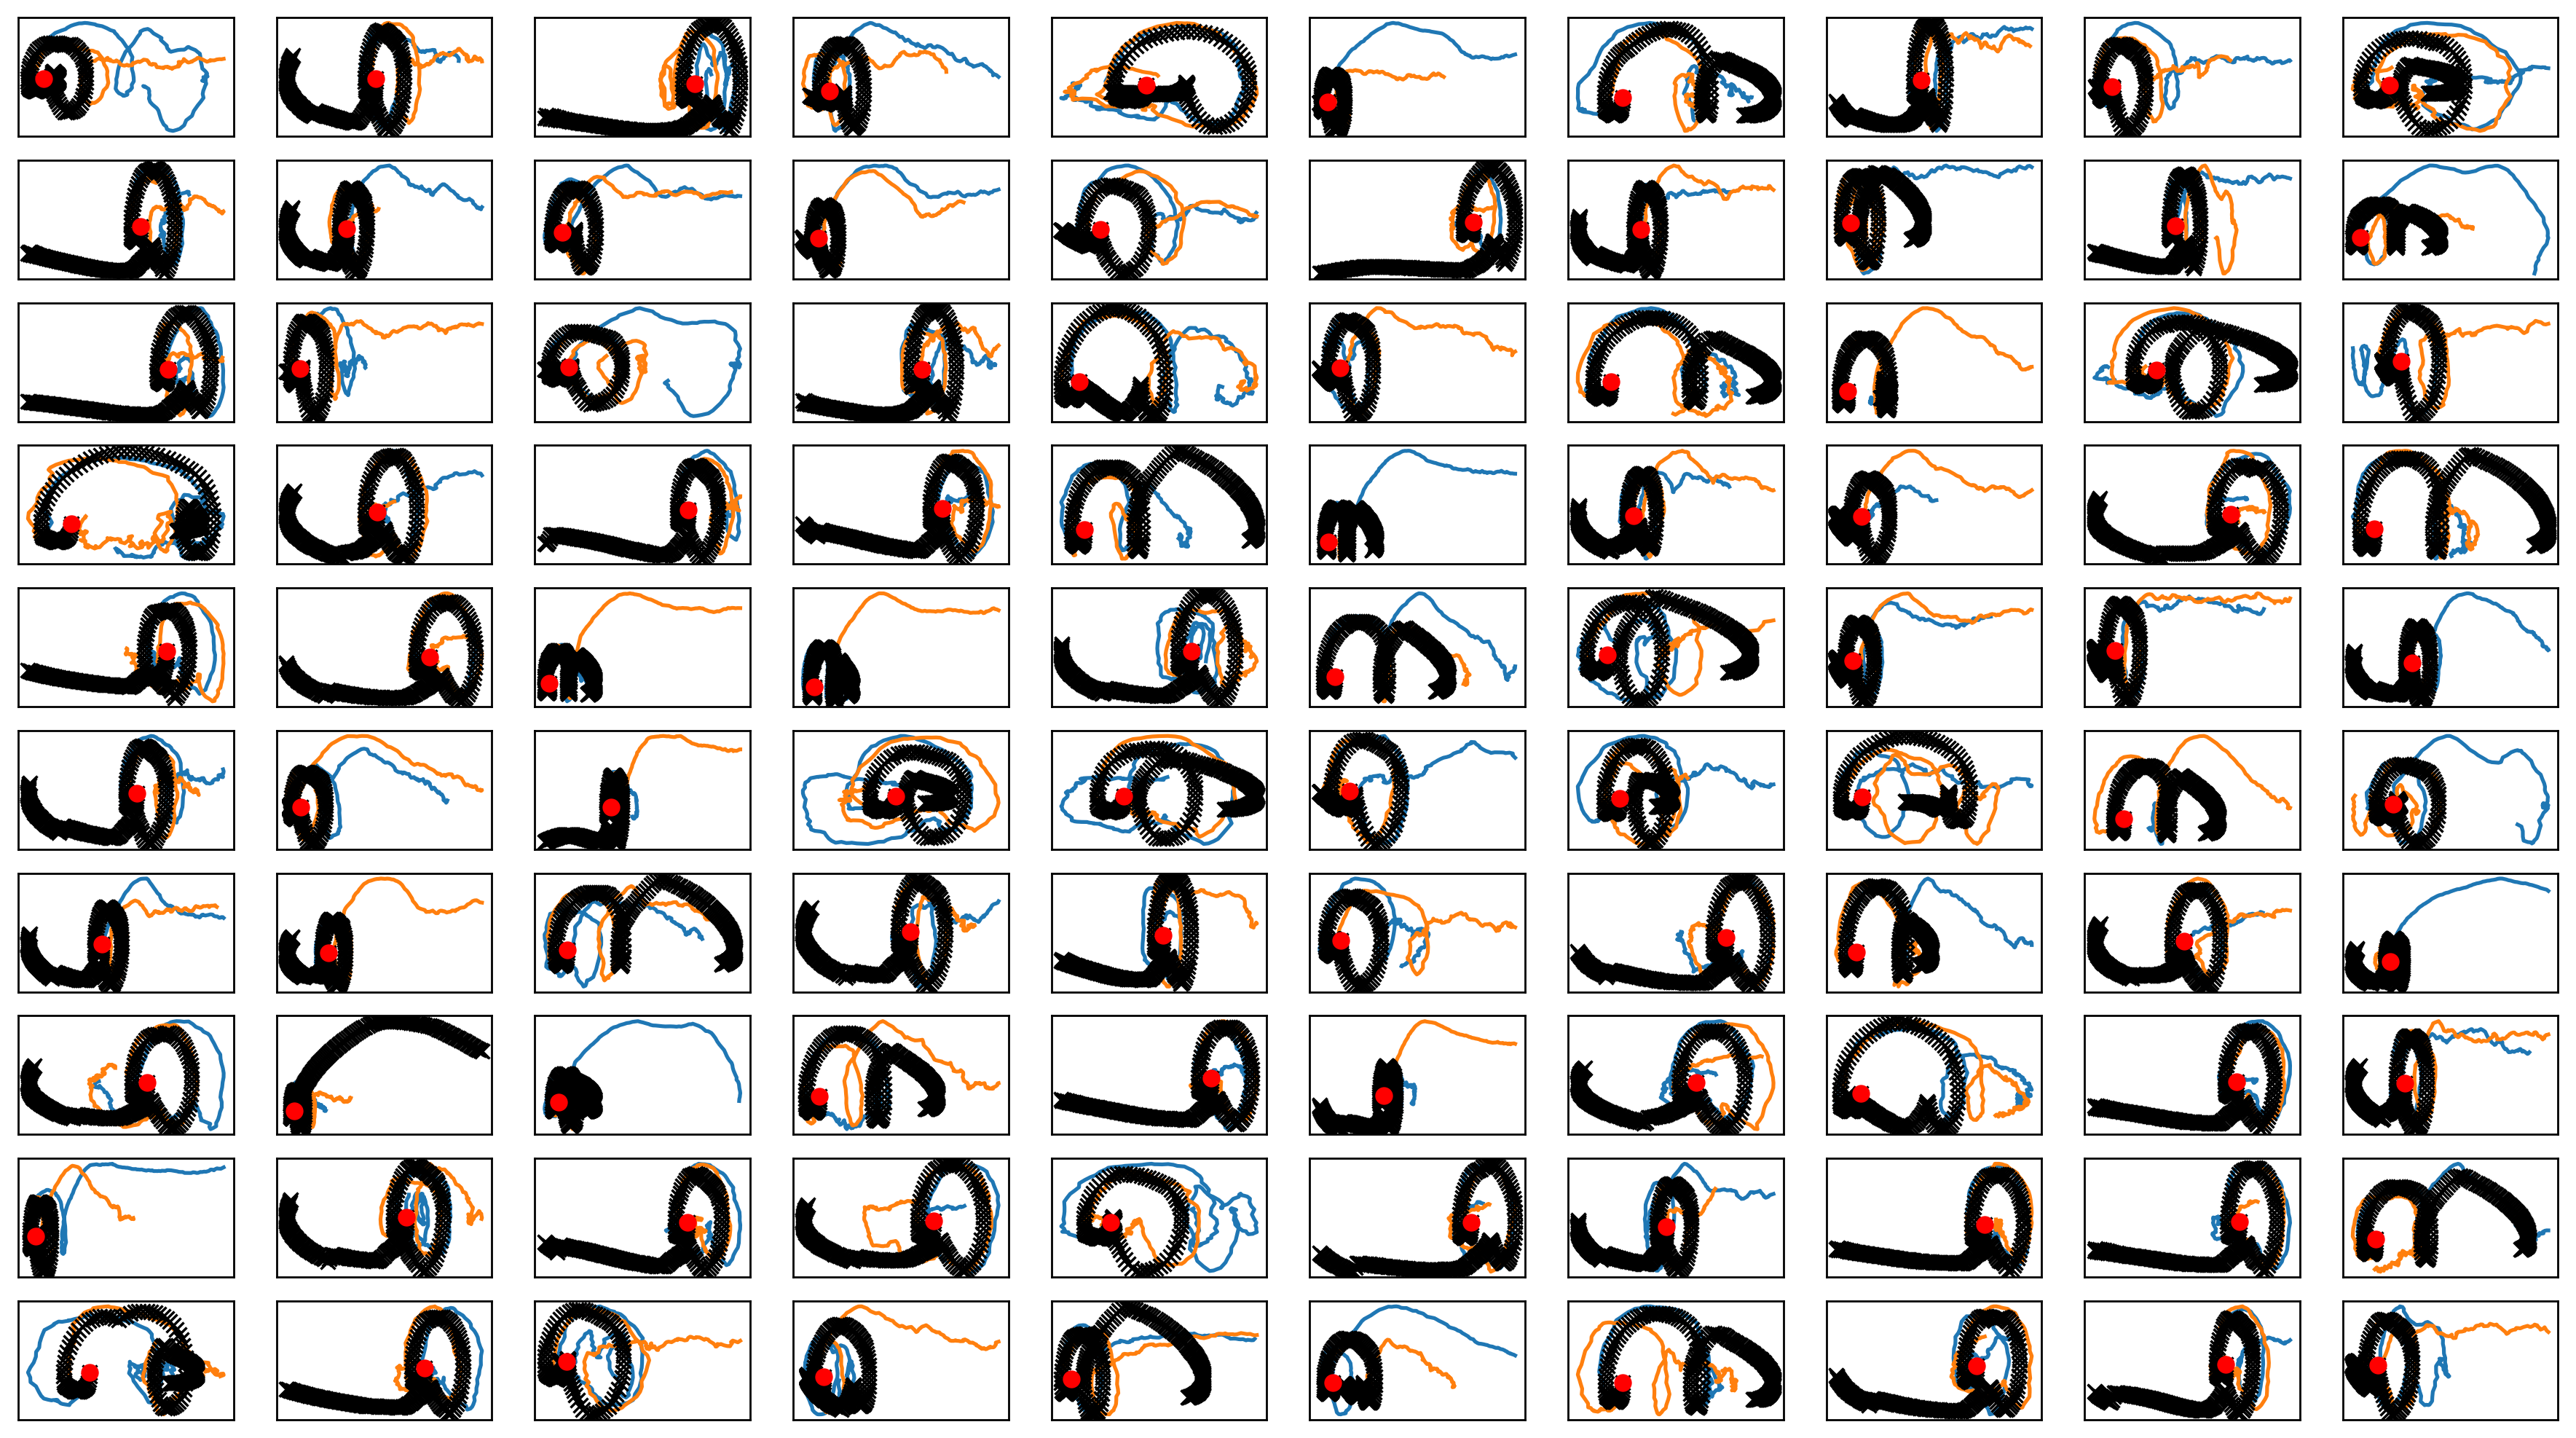

In [10]:

fig = plt.figure(figsize=(18,10), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
#     ax_list[-1].plot(iwvi.offline_data[i][:,0], iwvi.offline_data[i][:,1],"kx") 
#     ax_list[-1].plot(iwvi.simenv_rolloutdata[i][:,0], iwvi.simenv_rolloutdata[i][:,1],"o") 
    ax_list[-1].plot(simdata0a[i][:,0], simdata0a[i][:,1]) 
    ax_list[-1].plot(simdata0b[i][:,0], simdata0b[i][:,1]) 
#     ax_list[-1].plot(simdata0c[i][:,0], simdata0c[i][:,1]) 

    ax_list[-1].plot(iwvi.debug_realenv_rolloutdata[i][:,0], iwvi.debug_realenv_rolloutdata[i][:,1],"kx")
    ax_list[-1].plot(0, 0,"ro")
plt.savefig(figfilenamehead+"iter1.png")
# plt.savefig(figfilenamehead+"iter0.pdf")
plt.savefig(figfilenamehead+"iter1.eps")
print("実環境方策rollout vs Sim環境方策rollout")

実環境方策rollout vs Sim環境方策rollout


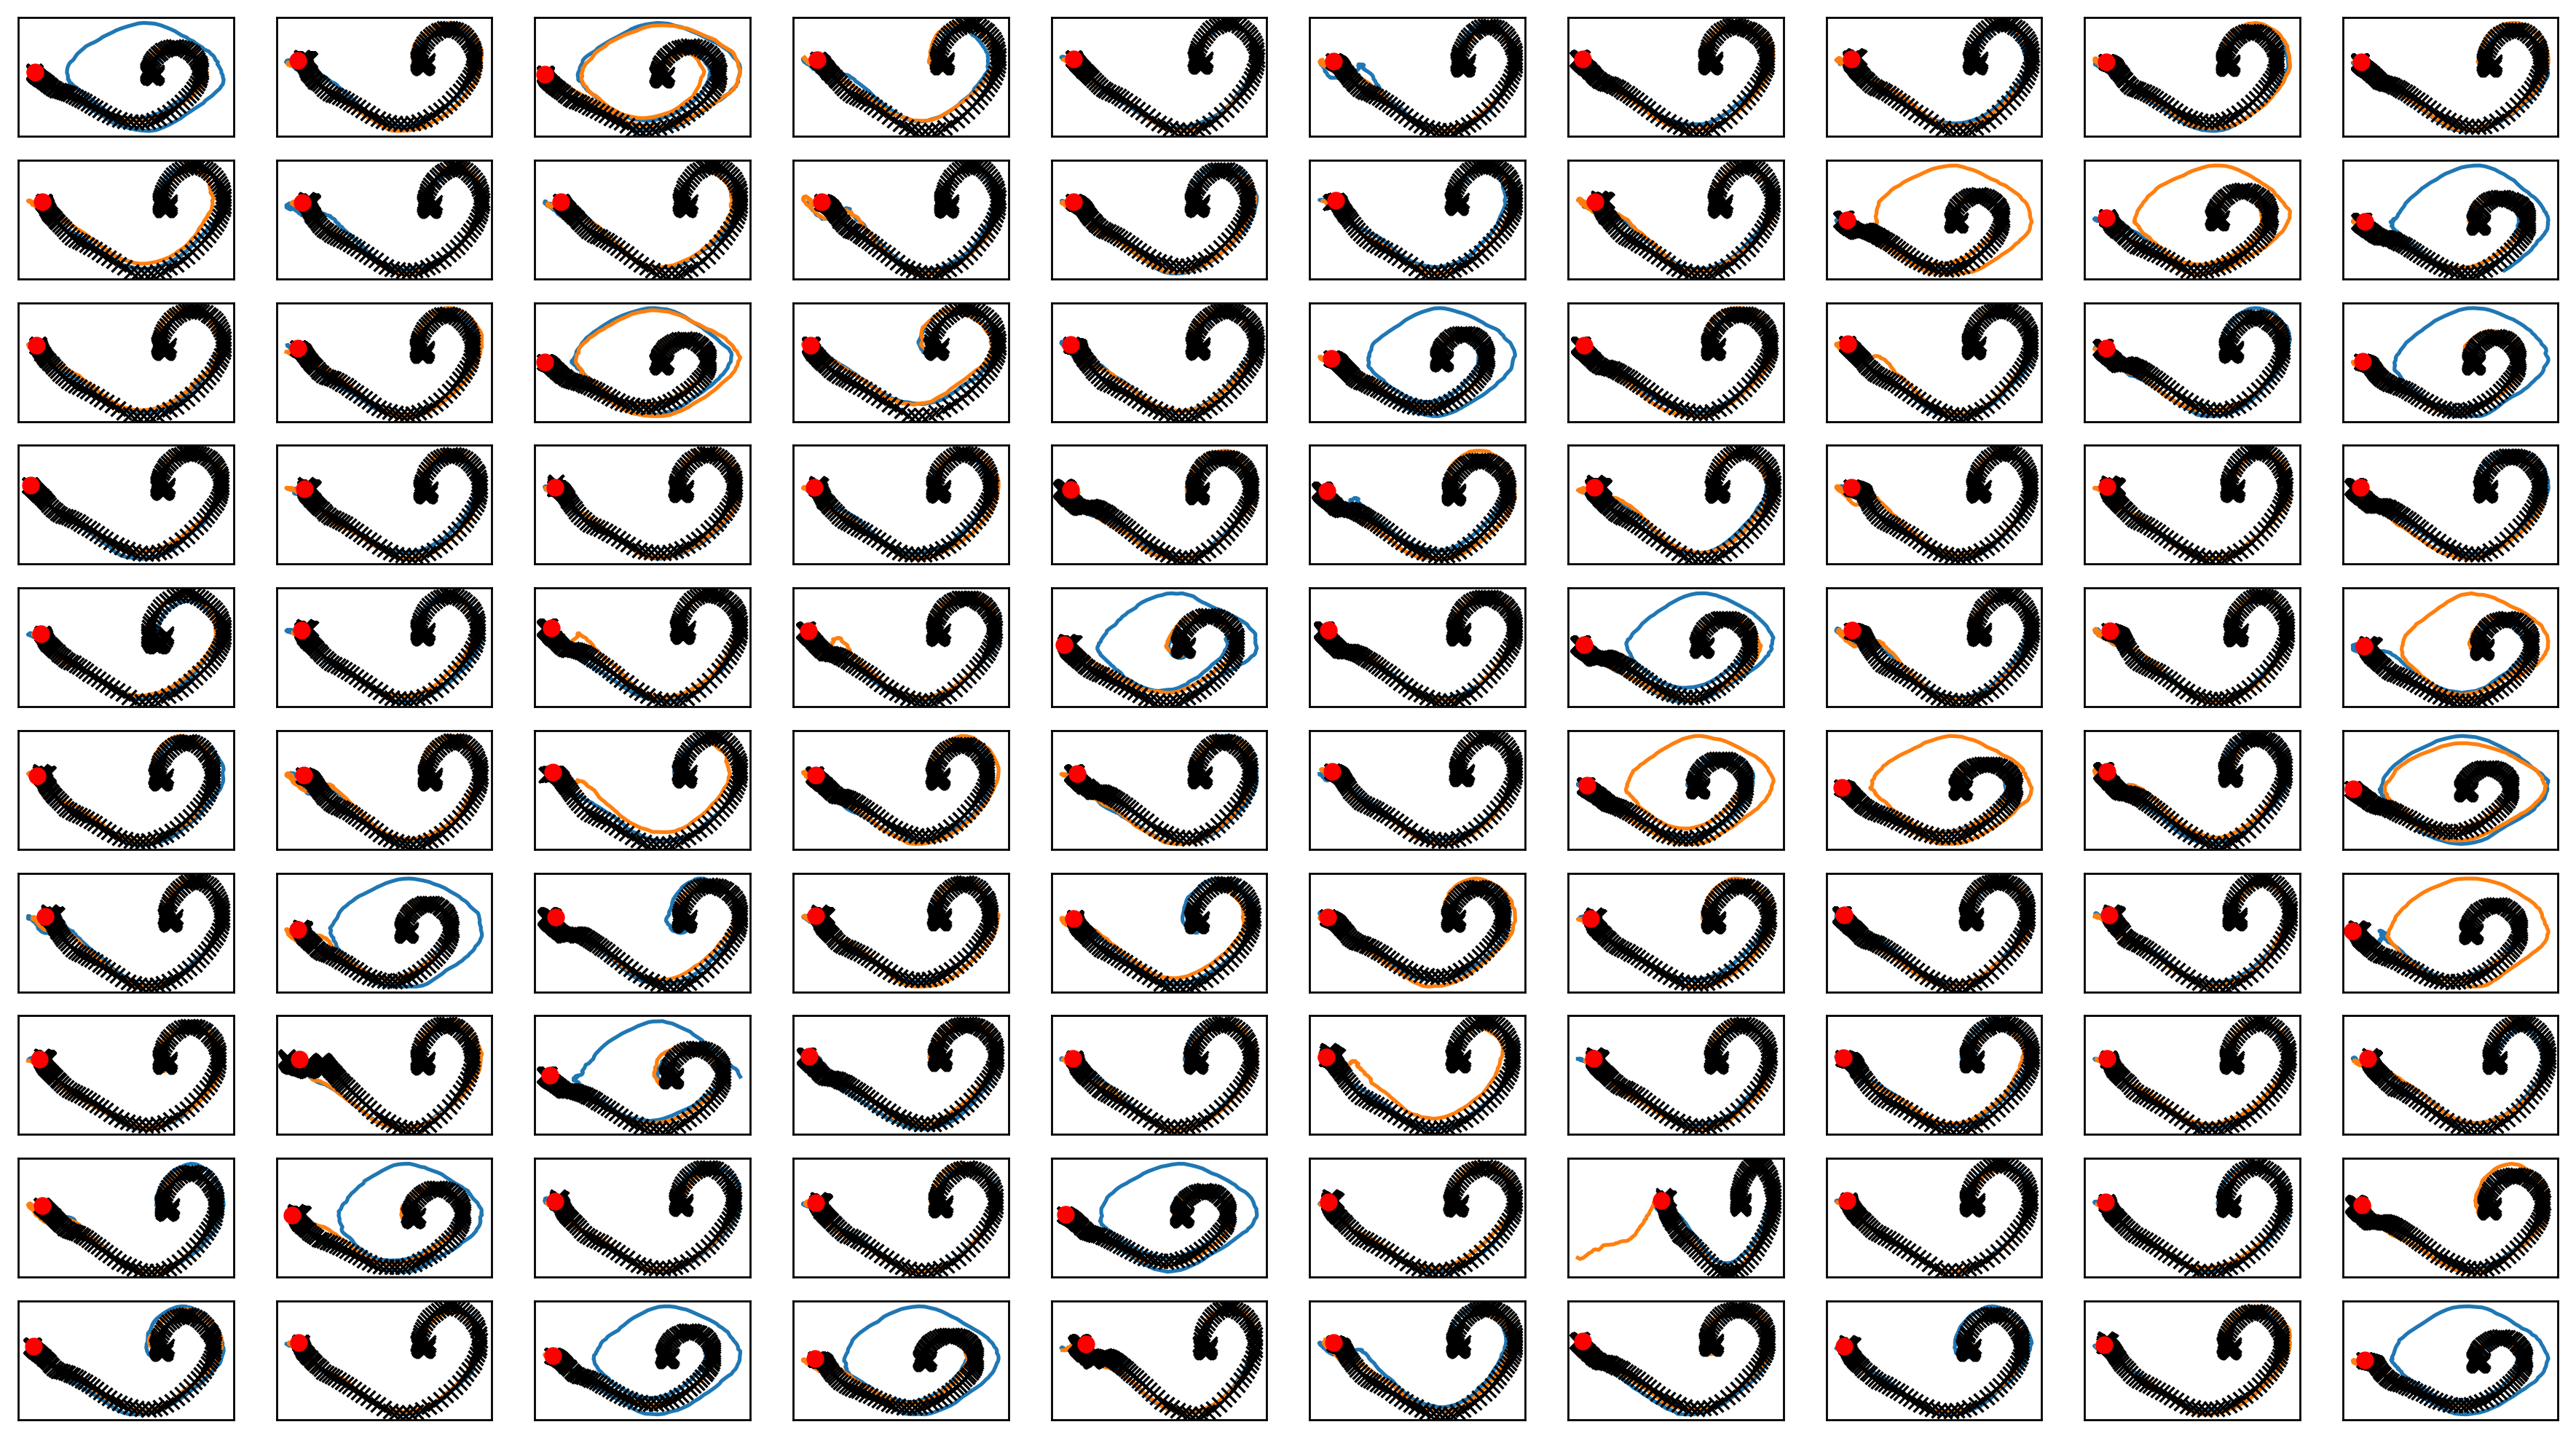

In [11]:

fig = plt.figure(figsize=(18,10), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
#     ax_list[-1].plot(iwvi.offline_data[i][:,0], iwvi.offline_data[i][:,1],"kx") 
#     ax_list[-1].plot(iwvi.simenv_rolloutdata[i][:,0], iwvi.simenv_rolloutdata[i][:,1],"o") 
    ax_list[-1].plot(simdata0a[i][:,2], simdata0a[i][:,3]) 
    ax_list[-1].plot(simdata0b[i][:,2], simdata0b[i][:,3]) 
#     ax_list[-1].plot(simdata0c[i][:,0], simdata0c[i][:,1]) 

    ax_list[-1].plot(iwvi.debug_realenv_rolloutdata[i][:,2], iwvi.debug_realenv_rolloutdata[i][:,3],"kx")
    ax_list[-1].plot(0, 0,"ro")
plt.savefig(figfilenamehead+"iter0.png")
# plt.savefig(figfilenamehead+"iter0.pdf")
plt.savefig(figfilenamehead+"iter0.eps")
print("実環境方策rollout vs Sim環境方策rollout")

In [12]:
print(datetime.datetime.now())

2023-07-23 22:13:13.956575
